# Задание #9. Прогнозирование с помощью временных рядов

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [3]:
import os

# Устанавливаем значение рабочей дирректории.
os.chdir("C:/Users/Michael/Documents/DataSet/Task_8")

In [4]:
# Чтение данных из таблицы.
electric_power = pd.read_xml("electric_power.xml")

In [5]:
# Выводим на экран первые 5 элементов таблицы.
electric_power.head()

,VALUE,DATE,HOUR
0,243887.0,01.01.2009 0:00:00.000000,1
1,243068.0,01.01.2009 0:00:00.000000,2
2,242266.0,01.01.2009 0:00:00.000000,3
3,242659.0,01.01.2009 0:00:00.000000,4
4,243724.0,01.01.2009 0:00:00.000000,5


In [6]:
# Преобразование аргумента в дату.
electric_power["DATE"] = pd.to_datetime(electric_power["DATE"], format="%d.%m.%Y %H:%M:%S.%f")
electric_power.head()

,VALUE,DATE,HOUR
0,243887.0,2009-01-01,1
1,243068.0,2009-01-01,2
2,242266.0,2009-01-01,3
3,242659.0,2009-01-01,4
4,243724.0,2009-01-01,5


In [7]:
# Избавляемся от колонки с часами
del electric_power["HOUR"]
# Укрупняем данные до суточного потребления
electric_power = electric_power.groupby(['DATE'])['VALUE'].sum()

In [8]:
# Выводим на экран первые 5 элементов
electric_power.head()

DATE
2009-01-01    5830312.0
2009-01-02    5865441.0
2009-01-03    5949114.0
2009-01-04    6067779.0
2009-01-05    6115772.0
Name: VALUE, dtype: float64

In [9]:
# Вернём Series в DataFrame.
electric_power = pd.DataFrame({'DATE':electric_power.index, 'VALUE':electric_power.values})

In [10]:
# Выводим на экран первые 5 элементов таблицы.
electric_power.head()

,DATE,VALUE
0,2009-01-01,5830312.0
1,2009-01-02,5865441.0
2,2009-01-03,5949114.0
3,2009-01-04,6067779.0
4,2009-01-05,6115772.0


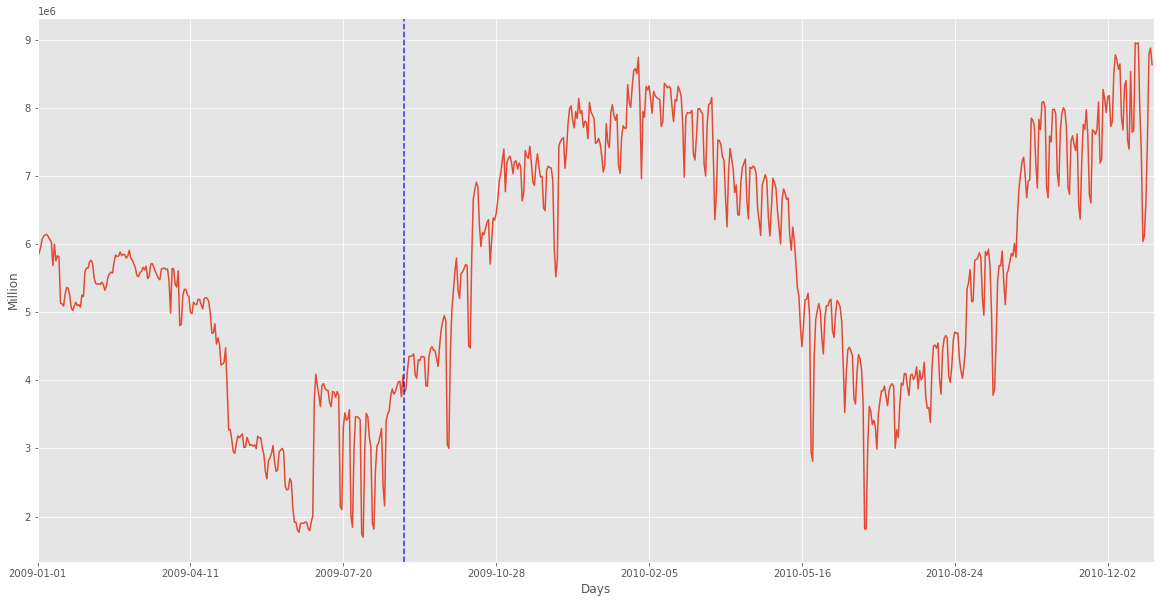

In [11]:
# Визуализация графика.
fig = plt.figure(figsize=(20, 10))
ax = electric_power['VALUE'].plot()
plt.ylabel("Million")
plt.xlabel("Days")
ax.set_xlim(xmin=0, xmax=len(electric_power['DATE']))

labels = [item.get_text() for item in ax.get_xticklabels()]

for i in range (0, 8):
    date = electric_power["DATE"].dt.date
    labels[i] = date.loc[i*100]

ax.set_xticklabels(labels)

plt.axvline(240, color='blue', alpha=0.8, linestyle='dashed');

In [12]:
# Избавляемся от шумов в начале.
N = 240
electric_power = electric_power[N:]
electric_power.reset_index(drop=True, inplace=True)

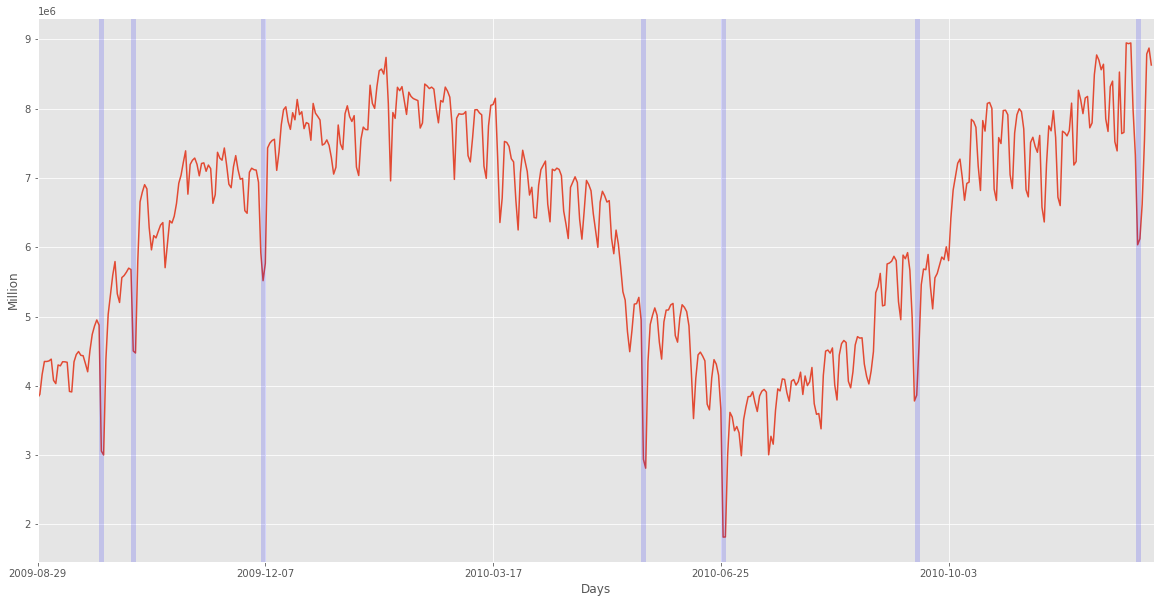

In [13]:
# Визуализация графика.
fig = plt.figure(figsize=(20, 10))
ax = electric_power['VALUE'].plot()
plt.ylabel("Million")
plt.xlabel("Days")

labels = [item.get_text() for item in ax.get_xticklabels()]

for i in range (0, 5):
    date = electric_power["DATE"].dt.date
    labels[i] = date.loc[i*100]

ax.set_xticklabels(labels)

# Отметим выбросы.
plt.axvline(x = 28, linewidth = 5, color ='blue', alpha=0.15) 
plt.axvline(x = 42, linewidth = 5, color ='blue', alpha=0.15) 
plt.axvline(x = 99, linewidth = 5, color ='blue', alpha=0.15) 
plt.axvline(x = 266, linewidth = 5, color ='blue', alpha=0.15) 
plt.axvline(x = 301, linewidth = 5, color ='blue', alpha=0.15) 
plt.axvline(x = 386, linewidth = 5, color ='blue', alpha=0.15)
plt.axvline(x = 483, linewidth = 5, color ='blue', alpha=0.15)

ax.set_xlim(xmin=0, xmax=len(electric_power['DATE']));

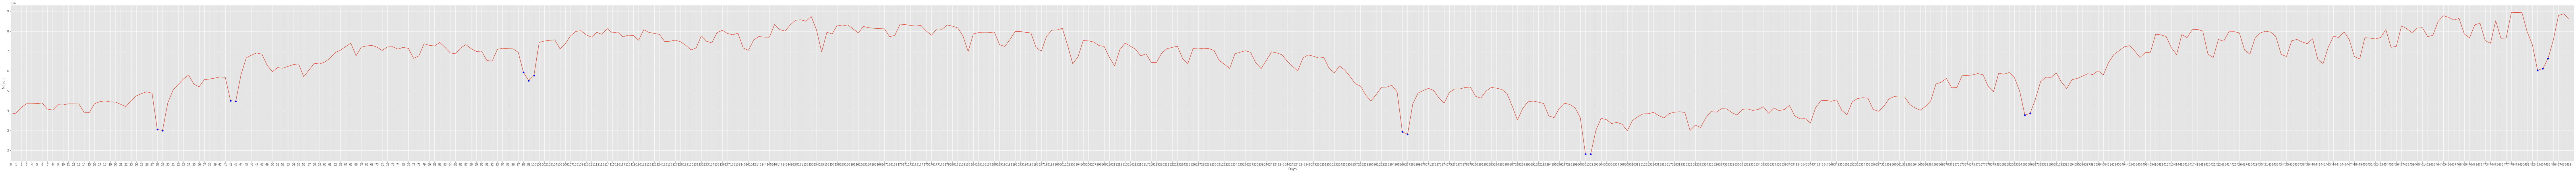

In [14]:
# Визуализация графика.
fig = plt.figure(figsize=(160, 10))
ax = electric_power['VALUE'].plot()
plt.ylabel("Million")
plt.xlabel("Days")
plt.xticks(electric_power.index)

# Определим выбросы поточечно.
plt.plot(28, electric_power.at[28, 'VALUE'], "bo", markersize=5)
plt.plot(29, electric_power.at[29, 'VALUE'], "bo", markersize=5) 
plt.plot(42, electric_power.at[42, 'VALUE'], "bo", markersize=5) 
plt.plot(43, electric_power.at[43, 'VALUE'], "bo", markersize=5) 
plt.plot(98, electric_power.at[98, 'VALUE'], "bo", markersize=5) 
plt.plot(99, electric_power.at[99, 'VALUE'], "bo", markersize=5) 
plt.plot(100, electric_power.at[100, 'VALUE'], "bo", markersize=5) 
plt.plot(266, electric_power.at[266, 'VALUE'], "bo", markersize=5) 
plt.plot(267, electric_power.at[267, 'VALUE'], "bo", markersize=5) 
plt.plot(301, electric_power.at[301, 'VALUE'], "bo", markersize=5) 
plt.plot(302, electric_power.at[302, 'VALUE'], "bo", markersize=5) 
plt.plot(385, electric_power.at[385, 'VALUE'], "bo", markersize=5) 
plt.plot(386, electric_power.at[386, 'VALUE'], "bo", markersize=5)
plt.plot(483, electric_power.at[483, 'VALUE'], "bo", markersize=5) 
plt.plot(484, electric_power.at[484, 'VALUE'], "bo", markersize=5) 
plt.plot(485, electric_power.at[485, 'VALUE'], "bo", markersize=5) 

ax.set_xlim(xmin=0, xmax=len(electric_power['DATE']));

In [15]:
# Избавляемся от всех выбросов и обновляем индекс.
electric_power.drop(axis=0, index=[28, 29, 42, 43, 98, 99, 100, 266, 267, 301, 302, 385, 386, 483, 484, 485], inplace=True)
electric_power.reset_index(drop=True, inplace=True)

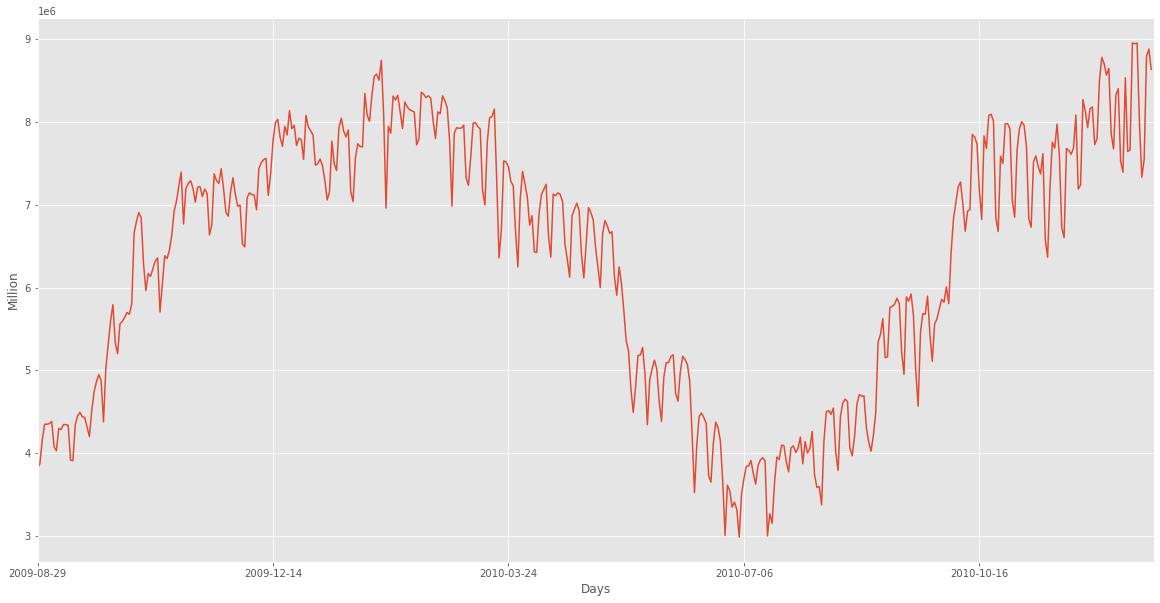

In [16]:
# Визуализация графика.
fig = plt.figure(figsize=(20, 10))
ax = electric_power['VALUE'].plot()
plt.ylabel("Million")
plt.xlabel("Days")

labels = [item.get_text() for item in ax.get_xticklabels()]

for i in range (0, 5):
    date = electric_power["DATE"].dt.date
    labels[i] = date.loc[i*100]
    
ax.set_xticklabels(labels)

ax.set_xlim(xmin=0, xmax=len(electric_power['DATE']));

In [17]:
# Добавим колонки дни недели и месяцы.
electric_power["Week"] = electric_power['DATE'].dt.weekday
electric_power["Month"] = electric_power['DATE'].dt.month

In [18]:
# Выводим на экран первые 5 элементов таблицы.
electric_power.head()

,DATE,VALUE,Week,Month
0,2009-08-29,3823792.0,5,8
1,2009-08-30,3877299.0,6,8
2,2009-08-31,4163411.0,0,8
3,2009-09-01,4351646.0,1,9
4,2009-09-02,4351476.0,2,9


Создадим 7 колонок ```season_week_0```, ```season_week_1```, ..., ```season_week_6```, в которые поместим индикаторы соответствующего дня недели. Внутри цикла будем проверять, равен ли очередной день недели текущему значению из цикла.

In [19]:
for x in range(0, 7):
    electric_power['season_week_' + str(x)] = electric_power['Week'] == x

Создадим 12 колонок ```season_month_1```, ```season_month_2```, ..., ```season_month_12```, в которые поместим индикаторы соответствующего месяца. Внутри цикла будем проверять, равен ли очередной месяц текущему значению из цикла.

In [20]:
for x in range(1, 13):
    electric_power['season_month_' + str(x)] = electric_power['Month'] == x

In [21]:
electric_power

,DATE,VALUE,Week,Month,season_week_0,season_week_1,season_week_2,season_week_3,season_week_4,season_week_5,...,season_month_3,season_month_4,season_month_5,season_month_6,season_month_7,season_month_8,season_month_9,season_month_10,season_month_11,season_month_12
0,2009-08-29,3823792.0,5,8,False,False,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
1,2009-08-30,3877299.0,6,8,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,2009-08-31,4163411.0,0,8,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,2009-09-01,4351646.0,1,9,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,2009-09-02,4351476.0,2,9,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,2010-12-24,7331580.0,4,12,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
470,2010-12-28,7543819.0,1,12,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
471,2010-12-29,8790105.0,2,12,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
472,2010-12-30,8876376.0,3,12,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


Для устранения линейной зависимости между колонками, один из сезонных индикаторов придётся исключить. Пусть базовым днём недели будет воскресенье и базовым месяцем январь.

In [22]:
season_columns_week = ['season_week_' + str(x) for x in range(0, 6)]
season_columns_month = ['season_month_' + str(x) for x in range(2, 13)]

df_predict = electric_power[["DATE", "VALUE"]].tail(1)
number_of_index = electric_power.tail(1).index.item()
date = electric_power["DATE"].dt.date

# Создадим объекты матрицу X и вектор y для обучения модели
electric_power["DATE"] = range(1, (len(electric_power)) + 1)
X_train = electric_power[['DATE'] + season_columns_week + season_columns_month]
y = electric_power['VALUE']

In [23]:
# Инициализируем модель
model = LinearRegression()

# Заполняем модель
model.fit(X_train, y)

LinearRegression()

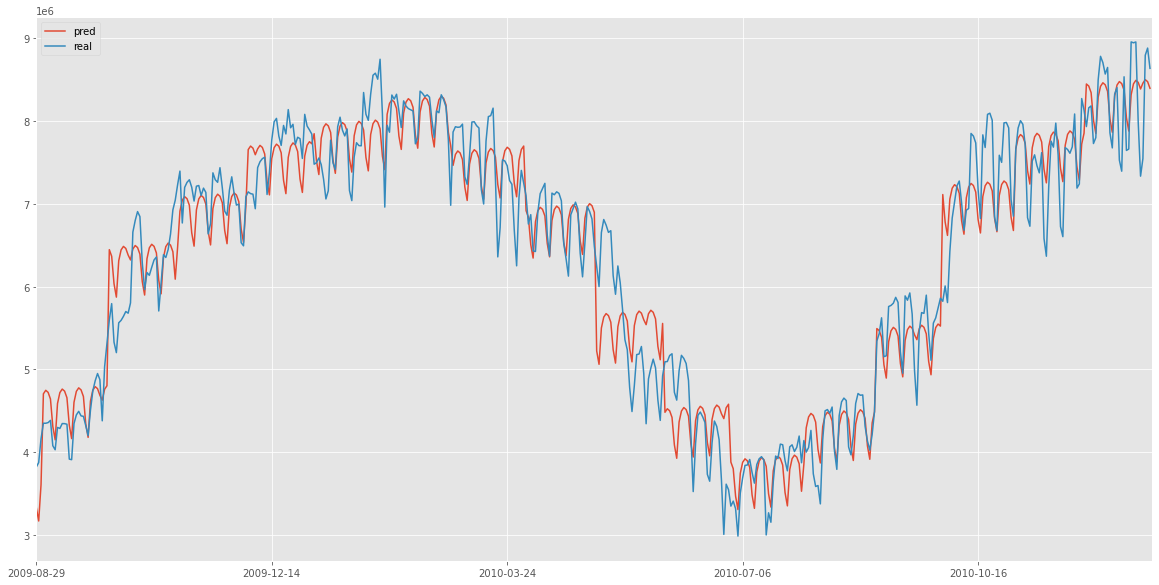

In [24]:
# Построим график и визуализируем модель
pred = pd.DataFrame({
    'pred': model.predict(X_train),
    'real': y})
ax = pred.plot(figsize=(20, 10))

labels = [item.get_text() for item in ax.get_xticklabels()]

for i in range (0, 5):
    labels[i] = date.loc[i*100]

ax.set_xticklabels(labels)

ax.set_xlim(xmin=0, xmax=len(electric_power['DATE']));

In [25]:
# Выведем оценку модели с помощью коэффициент детерминации
model.score(X_train, y)

0.9241170461744255

In [26]:
# Добавим библиотеки метрик качества
from sklearn import metrics
from scipy import stats

In [27]:
# Функция для сравнения исходных и прогнозных значений с помощью метрик качества 
def result_of_metrics(y_true, y_pred):
    # Средняя абсолютная ошибка прогноза
    print("MAE =", metrics.mean_absolute_error(y_true, y_pred))
    
    # Среднеквадратичное отклонение
    print("MSE =", metrics.mean_squared_error(y_true, y_pred))
    
    # Средняя относительная ошибка
    print("MAPE =", metrics.mean_absolute_percentage_error(y_true, y_pred))
    
    # Cреднее абсолютное отклонение
    print("MAD =", stats.median_abs_deviation(y_pred))
    
    # Коэффициент детерминации
    print("R2 =", metrics.r2_score(y_true, y_pred))

In [28]:
# Выведем результаты метрик качества 
result_of_metrics(y, model.predict(X_train))

MAE = 332384.5550844967
MSE = 181167851428.58972
MAPE = 0.05707543347781248
MAD = 1051351.118831506
R2 = 0.9241170461744255


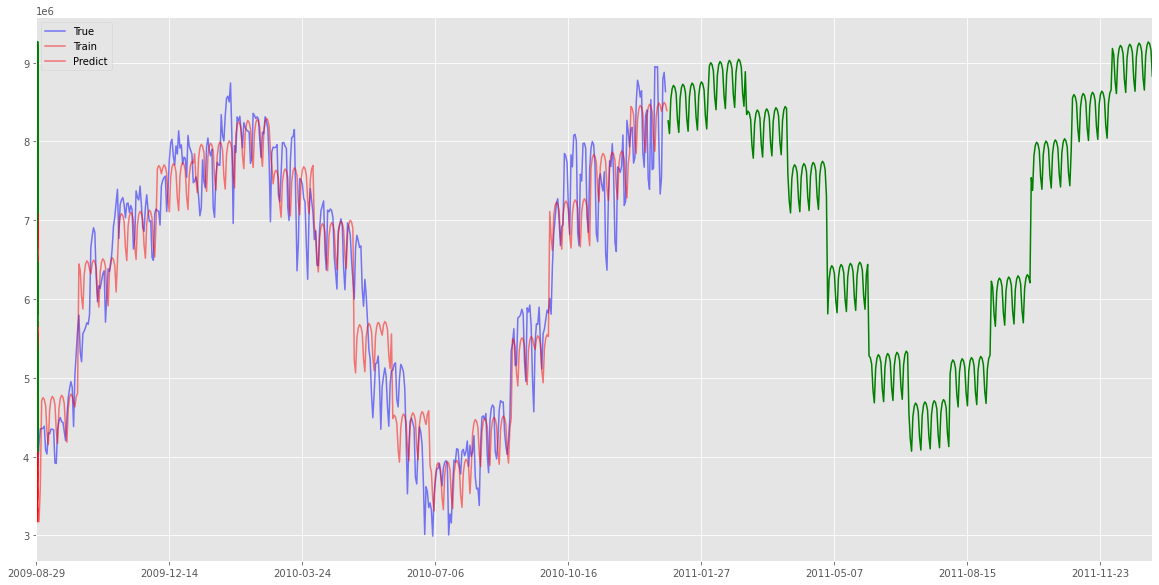

In [29]:
import datetime

#Указываем день, на сколько мы предсказываем
count_of_day = 365
count = 0

#Заполняем таблицу последющих дней
while count_of_day > count:
    df_predict.loc[len(df_predict.index)] = [df_predict["DATE"].iloc[-1] + datetime.timedelta(days=1), np.nan]
    count += 1

#Удалим первое значение, с помощью которого мы инизиализировали данную таблицу
df_predict = df_predict.iloc[1:]
#Продолжим ввести индексацию согласно той, что была в начале 
df_predict.index += number_of_index

# Добавим колонки дни недели и месяцы.
df_predict["Week"] = df_predict['DATE'].dt.weekday
df_predict["Month"] = df_predict['DATE'].dt.month
    
# Создадим колонки с индикаторами
for x in range(0, 7):
    df_predict['season_week_' + str(x)] = df_predict['Week'] == x
        
for x in range(1, 13):
    df_predict['season_month_' + str(x)] = df_predict['Month'] == x

#  Базовые значения воскресенье и январь.
season_columns_week = ['season_week_' + str(x) for x in range(0, 6)]
season_columns_month = ['season_month_' + str(x) for x in range(2, 13)]

date_2 = df_predict["DATE"].dt.date

df_predict["DATE"] = range(1, (len(df_predict)) + 1)
#Продолжим ввести дату согласно той, что была в начале
df_predict.DATE += number_of_index + 1

# Создадим объект матрицу X 
X_test = df_predict[['DATE'] + season_columns_week + season_columns_month]
    
# Построим график и визуализируем модель с предсказанием
fig = plt.figure(figsize=(20, 10))
ax = electric_power['VALUE'].plot(color="blue", alpha=0.5)
ax.set_xlim(xmin=0, xmax=len(electric_power['DATE']) + len(df_predict['DATE']))
plt.plot(X_train, model.predict(X_train), color="red", alpha=0.5)
plt.plot(X_test, model.predict(X_test), color="green")

labels = [item.get_text() for item in ax.get_xticklabels()]

for i in range (0, 5):
    labels[i] = date.loc[i*100]
    
for i in range (5, 6 + count_of_day // 100):
    labels[i] = date_2.loc[i*100]

ax.set_xticklabels(labels)

plt.legend(["True", "Train", "Predict"]);

In [30]:
model.predict(X_test).sum()

2592993905.7169924

In [31]:
from sklearn.model_selection import train_test_split

value = electric_power["VALUE"]
features = electric_power.drop("VALUE", axis=1)

X_train, X_test, y_train, y_test =  train_test_split(features, value, test_size = 0.2, random_state = 42)

# Инициализируем модель
model_analysis = LinearRegression()

# Заполняем модель
model_analysis.fit(X_train, y_train)

LinearRegression()

In [32]:
# Коэффициент детерминации & cреднее абсолютное отклонение
print("Train:", model_analysis.score(X_train, y_train), "MAD =", stats.median_abs_deviation(y_train))
print("Test:", model_analysis.score(X_test, y_test), "MAD =", stats.median_abs_deviation(y_test))

Train: 0.9257802470085768 MAD = 1144778.0
Test: 0.9110116780180552 MAD = 1026970.0
